In [35]:
import csv
import wave
import math
from pydub import AudioSegment
from python_speech_features import mfcc
from python_speech_features import delta
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import pandas as pd
import numpy as np
import os as os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pylab as pl
import seaborn as sns
import itertools
import pylab as plt
from sklearn.model_selection import GridSearchCV

#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, datasets

#svm
from sklearn import svm
from sklearn.svm import SVC

#neural network
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU



read data from csv file

In [36]:
data = pd.read_csv('MFCC_CO.csv', header=0)
data = data.dropna()

# confusion matrix function

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Logistic Regression

preform grid search in order to optimize Parameters

In [4]:
X = data[['1', '2', '3','4','5', '6','7','8','10','11','12','13']]
y = data['14']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Create logistic regression
logistic = linear_model.LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
# Fit grid search
best_model = clf.fit(X_train, y_train)
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
# Predict target vector
best_model.predict(X_test)


Best Penalty: l1
Best C: 464.15888336127773


array([5., 5., 3., ..., 2., 3., 2.])

preform Logistic Regression

In [16]:
logmodel = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=464.15888336127773)
logmodel.fit(X_train,y_train)

LogisticRegression(C=464.15888336127773, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

create prdiction and report

In [17]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        1.0       0.35      0.05      0.09      3628
        2.0       0.41      0.56      0.47      7315
        3.0       0.58      0.57      0.57      8081
        4.0       0.32      0.05      0.09      3528
        5.0       0.46      0.66      0.54      7678

avg / total       0.45      0.47      0.43     30230



confusion matrix and heatmap

Normalized confusion matrix
[[0.05485116 0.41593164 0.15242558 0.02480706 0.35198456]
 [0.01298701 0.56431989 0.18386876 0.01626794 0.22255639]
 [0.01930454 0.23487192 0.56886524 0.00395991 0.17299839]
 [0.01672336 0.34778912 0.13435374 0.05442177 0.44671202]
 [0.00794478 0.18325085 0.12933055 0.02070852 0.6587653 ]]


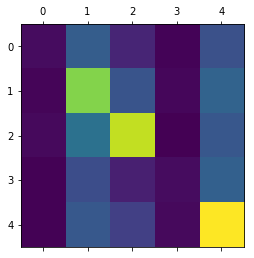

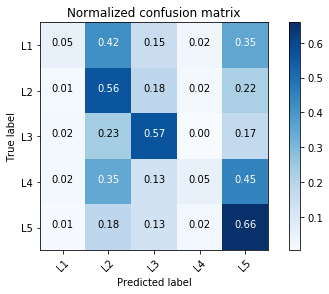

In [18]:
cm = confusion_matrix(y_test, predictions)
pl.matshow(cm)
class_names=['L1','L2','L3','L4','L5']
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

using the default values of the LogisticRegression function

In [21]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        1.0       0.35      0.06      0.10      3628
        2.0       0.41      0.56      0.47      7315
        3.0       0.58      0.57      0.57      8081
        4.0       0.32      0.05      0.09      3528
        5.0       0.46      0.66      0.54      7678

avg / total       0.45      0.47      0.43     30230



# SVM

preform grid search in order to optimize Parameters

In [ ]:
#param_grid = [
#  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
# ]
X= data[['1', '2', '3','4','5', '6','7','8','10','11','12','13']]
y = data['14']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#hyper_parameters_optimization(X_train, y_train)
parameters = {'kernel':('linear', 'rbf'), 'C':(1,0.25,0.5,0.75),'gamma': (1,2,3,'auto'),'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)}
clf = GridSearchCV(SVC(), parameters)
clf.fit(X_train,y_train)
print("precision:"+str(np.average(cross_val_score(clf, X_train, y_train, scoring='precision'))))

preform SVM

In [ ]:
clf = svm.SVC()
clf.fit(X_train,y_train)  

# Tuning hyper-parameters for precision



create prdiction and report

In [54]:
predictions=clf.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        1.0       0.98      0.35      0.52      3628
        2.0       0.91      0.89      0.90      7315
        3.0       0.99      0.81      0.89      8081
        4.0       0.99      0.46      0.63      3528
        5.0       0.56      0.99      0.72      7678

avg / total       0.86      0.78      0.78     30230



confusion matrix and heatmap

Normalized confusion matrix
[[3.50606395e-01 7.66262404e-02 5.51267916e-03 1.10253583e-03
  5.66152150e-01]
 [4.10116200e-04 8.94053315e-01 3.28092960e-03 2.73410800e-04
  1.01982228e-01]
 [1.60871179e-03 2.05420121e-02 8.10543250e-01 3.71241183e-04
  1.66934785e-01]
 [8.50340136e-04 3.96825397e-02 1.98412698e-03 4.64285714e-01
  4.93197279e-01]
 [3.90726752e-04 8.20526179e-03 6.51211253e-04 0.00000000e+00
  9.90752800e-01]]


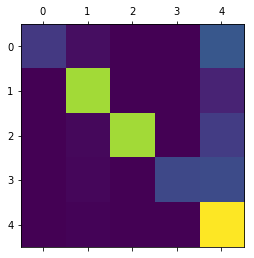

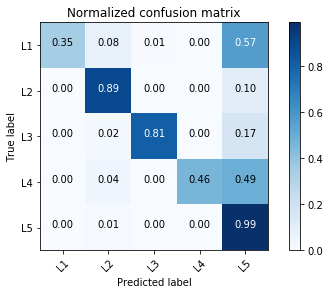

In [55]:
cm = confusion_matrix(y_test, predictions)
pl.matshow(cm)
class_names=['L1','L2','L3','L4','L5']
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

# neural network

preform grid search in order to optimize Parameters

In [ ]:
X= data[['1', '2', '3','4','5', '6','7','8','10','11','12','13']]
y = data['14']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
scores = ['precision', 'recall']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                        scoring='%s_macro' % score)
    clf.fit(X_train, y_train)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
                % (mean, std * 2, params))
    print()
    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")

In [26]:
    param_grid = {
        'hidden_layer_sizes': [(7, 7), (128,), (128, 7)],
        'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
        'epsilon': [1e-3, 1e-7, 1e-8, 1e-9, 1e-8]
    }
    MLP = GridSearchCV(
        MLPClassifier(learning_rate='adaptive', learning_rate_init=1., early_stopping=True, shuffle=True),
        param_grid=param_grid, n_jobs=-1)
    MLP.fit(X, y)
    MLP = MLP.best_estimator_
    print (MLP)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(128,), learning_rate='adaptive',
       learning_rate_init=1.0, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.001, validation_fraction=0.1,
       verbose=False, warm_start=False)


preform MLPClassifier

In [29]:
#mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
MLP.fit(X_train,y_train)
predictions = MLP.predict(X_test)

printing confusion matrix

In [30]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        1.0       0.25      0.01      0.02      3628
        2.0       0.37      0.00      0.00      7315
        3.0       0.27      1.00      0.42      8081
        4.0       0.29      0.00      0.01      3528
        5.0       0.50      0.00      0.00      7678

avg / total       0.35      0.27      0.12     30230



confusion matrix and heatmap

Normalized confusion matrix
[[0.34895259 0.26791621 0.1022602  0.05237045 0.22850055]
 [0.07382092 0.68831169 0.0556391  0.02802461 0.15420369]
 [0.04776637 0.09058285 0.76525183 0.0168296  0.07956936]
 [0.08758503 0.14172336 0.05895692 0.41043084 0.30130385]
 [0.05157593 0.11383173 0.03256056 0.02943475 0.77259703]]


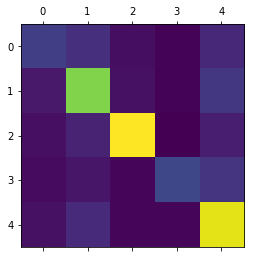

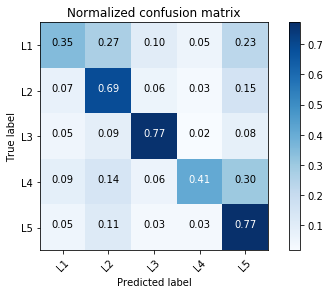

In [52]:
cm = confusion_matrix(y_test, predictions)
pl.matshow(cm)
class_names=['L1','L2','L3','L4','L5']
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

using the default values of the MLPClassifier function

In [33]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        1.0       0.45      0.19      0.27      3628
        2.0       0.59      0.73      0.65      7315
        3.0       0.85      0.73      0.78      8081
        4.0       0.59      0.38      0.46      3528
        5.0       0.57      0.78      0.66      7678

avg / total       0.64      0.64      0.62     30230



Normalized confusion matrix
[[0.19404631 0.34178611 0.08654906 0.05981257 0.31780595]
 [0.03390294 0.72631579 0.04784689 0.02734108 0.1645933 ]
 [0.02499691 0.10233882 0.72936518 0.02400693 0.11929217]
 [0.05357143 0.19586168 0.04620181 0.38321995 0.32114512]
 [0.02800208 0.12034384 0.03073717 0.04467309 0.77624381]]


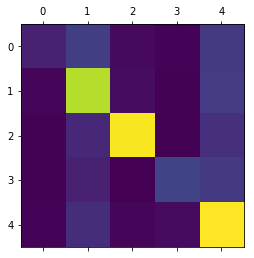

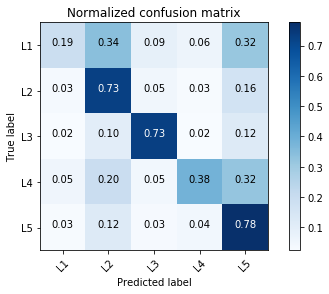

In [34]:
cm = confusion_matrix(y_test, predictions)
pl.matshow(cm)
class_names=['L1','L2','L3','L4','L5']
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()